In [1]:
import torch
import random
import torchvision
from glob import glob
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from src.models import Generator, Discriminator
from src.dataset import TrainDataset, ValidationDataset

In [2]:
images = glob('./VOC2012/JPEGImages/*')
random.shuffle(images)
len(images)

17125

In [3]:
train_images = images[:16000]
val_images = images[16000:17000]
test_images = images[17000:]

print('Train Images:', len(train_images))
print('Validation Images:', len(val_images))
print('Test Images:', len(test_images))

Train Images: 16000
Validation Images: 1000
Test Images: 125


## Testing Datasets

In [4]:
train_dataset = TrainDataset(train_images, crop_size=88, scale=2)
val_dataset = ValidationDataset(val_images, scale=2)

print('Length of Train Dataset:', len(train_dataset))
print('Length of Validation Dataset:', len(val_dataset))

Length of Train Dataset: 16000
Length of Validation Dataset: 1000


In [5]:
train_lr, train_hr = train_dataset[0]
train_lr.shape, train_hr.shape

(torch.Size([3, 44, 44]), torch.Size([3, 88, 88]))

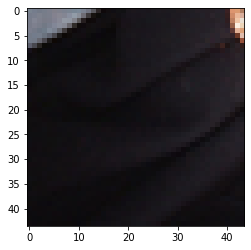

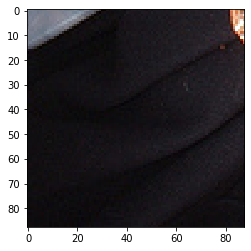

In [6]:
plt.imshow(torchvision.transforms.ToPILImage()(train_lr))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(train_hr))
plt.show()

In [7]:
val_lr, val_hr, val_hr_restore = val_dataset[0]
val_lr.shape, val_hr.shape, val_hr_restore.shape

(torch.Size([3, 187, 187]),
 torch.Size([3, 374, 374]),
 torch.Size([3, 374, 374]))

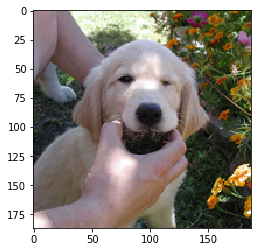

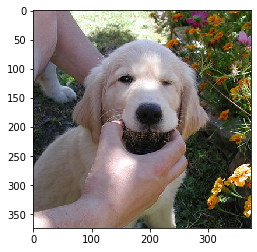

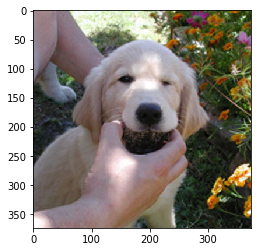

In [8]:
plt.imshow(torchvision.transforms.ToPILImage()(val_lr))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(val_hr))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(val_hr_restore))
plt.show()

## Testing Dataloaders

In [9]:
train_loader = train_dataset.get_loader(num_workers=1, batch_size=1)
val_loader = val_dataset.get_loader(num_workers=1, batch_size=1)

In [10]:
train_lr, train_hr = next(iter(train_loader))
train_lr.shape, train_hr.shape

(torch.Size([1, 3, 44, 44]), torch.Size([1, 3, 88, 88]))

In [11]:
val_lr, val_hr, val_hr_restore = next(iter(val_loader))
val_lr.shape, val_hr.shape, val_hr_restore.shape

(torch.Size([1, 3, 187, 187]),
 torch.Size([1, 3, 374, 374]),
 torch.Size([1, 3, 374, 374]))

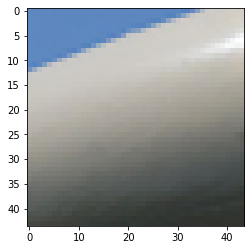

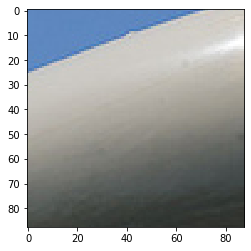

In [12]:
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_lr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_hr)))
plt.show()

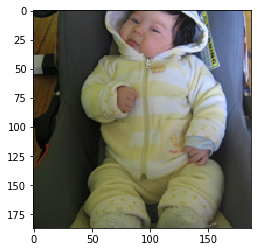

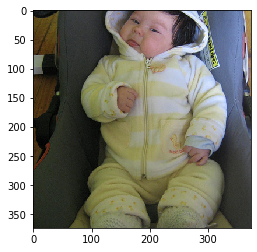

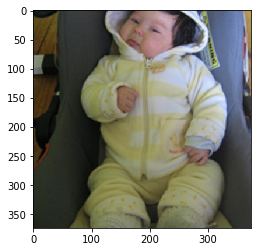

In [13]:
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_lr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_hr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_hr_restore)))
plt.show()

## Testing Generator Model

In [14]:
generator = Generator(scale=2)
print(generator)

Generator(
  (block_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): PReLU(num_parameters=1)
  )
  (block_2): Sequential(
    (0): ResidualBlock(
      (conv_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): PReLU(num_parameters=1)
      (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBlock(
      (conv_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): PReLU(num_parameters=1)
      (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm_2): BatchNorm2d(64, eps=1e-05, mom

In [15]:
train_sr = generator(train_lr)
train_sr.shape

torch.Size([1, 3, 88, 88])

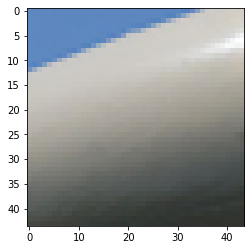

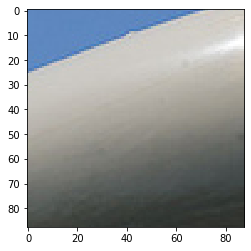

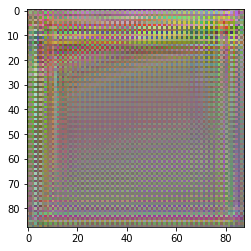

In [16]:
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_lr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_hr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(train_sr)))
plt.show()

In [17]:
val_sr = generator(val_lr)
val_sr.shape

torch.Size([1, 3, 374, 374])

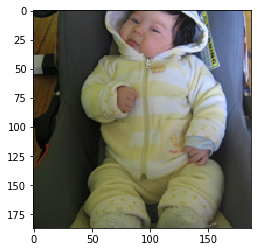

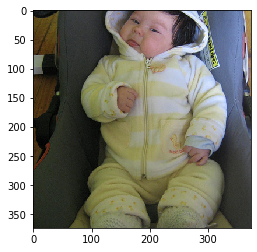

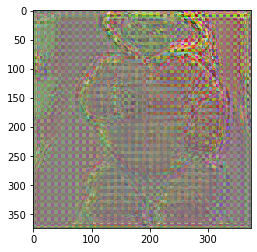

In [18]:
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_lr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_hr)))
plt.show()
plt.imshow(torchvision.transforms.ToPILImage()(torch.squeeze(val_sr)))
plt.show()

## Testing Discriminator Model

In [19]:
discriminator = Discriminator()
print(discriminator)

Discriminator(
  (net): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.2)
    (2): DiscriminatorBlock(
      (block): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (3): DiscriminatorBlock(
      (block): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
      )
    )
    (4): DiscriminatorBlock(
      (block): Sequential(
        (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.2)
     

In [20]:
train_real_output = discriminator(train_hr)
train_fake_output = discriminator(train_sr)

print('Train Real Output:', train_real_output.item())
print('Train Fake Output:', train_fake_output.item())

Train Real Output: 0.4982259273529053
Train Fake Output: 0.5000150203704834


## Testing VGG16 Feature Extraction

### Without Pre-trained Weights

In [21]:
vgg16 = torchvision.models.vgg.vgg16(pretrained=False)
network = torch.nn.Sequential(*list(vgg16.features)[:31]).eval()
for param in network.parameters():
    param.requires_grad = False

In [22]:
train_hr_features = network(train_hr)
train_sr_features = network(train_sr)

train_hr_features.shape, train_sr_features.shape

(torch.Size([1, 512, 2, 2]), torch.Size([1, 512, 2, 2]))

In [24]:
mse = torch.nn.MSELoss()
print('Train Perceptual Loss:', mse(train_hr_features, train_sr_features).item())

Train Perceptual Loss: 0.00010083617962663993


In [25]:
val_hr_features = network(val_hr)
val_sr_features = network(val_sr)

val_hr_features.shape, val_sr_features.shape

(torch.Size([1, 512, 11, 11]), torch.Size([1, 512, 11, 11]))

In [26]:
print('Validation Perceptual Loss:', mse(val_hr_features, val_sr_features).item())

Validation Perceptual Loss: 0.00016883629723452032


### With Pre-trained Weights

In [27]:
vgg16 = torchvision.models.vgg.vgg16(pretrained=True)
network = torch.nn.Sequential(*list(vgg16.features)[:31]).eval()
for param in network.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/soumikrakshit/.cache/torch/checkpoints/vgg16-397923af.pth


In [28]:
train_hr_features = network(train_hr)
train_sr_features = network(train_sr)

train_hr_features.shape, train_sr_features.shape

(torch.Size([1, 512, 2, 2]), torch.Size([1, 512, 2, 2]))

In [29]:
mse = torch.nn.MSELoss()
print('Train Perceptual Loss:', mse(train_hr_features, train_sr_features).item())

Train Perceptual Loss: 0.49571117758750916


In [30]:
val_hr_features = network(val_hr)
val_sr_features = network(val_sr)

val_hr_features.shape, val_sr_features.shape

(torch.Size([1, 512, 11, 11]), torch.Size([1, 512, 11, 11]))

In [31]:
print('Validation Perceptual Loss:', mse(val_hr_features, val_sr_features).item())

Validation Perceptual Loss: 0.514051616191864
